homogeneity mean: 0.16
contrast mean: 55.84
correlation mean: 0.60


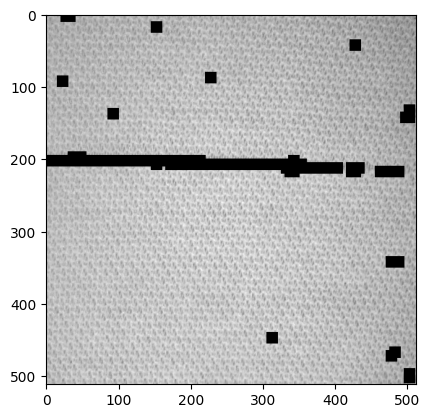

'\npath = "./videos/"\nfilelist = os.listdir(path)\nfps = 2 \nsize = (800, 600) \n\nvideo = cv2.VideoWriter("VideoTest1.avi", \n        cv2.VideoWriter_fourcc(\'I\', \'4\', \'2\', \'0\'), fps, size)\n\nfor item in filelist:\n    if item.endswith(\'.png\'): \n\n        item = path + item\n        img = cv2.imread(item)\n        video.write(img)\n\nvideo.release()\ncv2.destroyAllWindows()\n'

In [5]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

#Capture the video

path="./images/img"
'''
def get_images_from_video(video_name, time_F):
    video_images = []
    vc = cv2.VideoCapture(video_name)
    c = 1
    
    if vc.isOpened(): 
        rval, video_frame = vc.read()
    else:
        rval = False

    while rval:
        rval, video_frame = vc.read()
        
        if(c % time_F == 0):
            video_images.append(video_frame)     
        c = c + 1
    vc.release()
    
    return video_images

time_F = 5
video_name = 'texture_video.avi' 
video_images = get_images_from_video(video_name, time_F)
images_number=len(video_images)
for i in range(0,images_number):
    cv2.imwrite(path+str(i+1)+".png", video_images[i])
'''
#Capture the video



#image = cv2.imread('temp-b-7_10282020155242 071.jpg')
#image = cv2.imread('temp-b-7_10282020155844 0722.jpg')
#image = cv2.imread('temp-b-7_10282020160737 392.jpg')



for i in range(0,1):#images_number #photo1-1087
    start = time.time()
    Error_Detected=0
    num = i+1
    image = cv2.imread('image'+str(num)+'.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    size_filter = 16 #default 25
    nr,nc = image.shape[:2]
    #print(nr,nc)

    offset = 5 #default 5
    x_filter = int((nr)/offset)
    y_filter = int((nc)/offset)

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    end_r = nr - size_filter + offset
    end_c = nc - size_filter + offset

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    
    #print mean(no error)
    
    homogeneity_mean = np.mean(co_homogeneity)
    contrast_mean = np.mean(co_contrast)
    correlation_mean = np.mean(co_correlation)
    print("homogeneity mean: %.2f" % homogeneity_mean)
    print("contrast mean: %.2f" % contrast_mean)
    print("correlation mean: %.2f" % correlation_mean)
    
    for i in range(x_filter):
        for j in range(y_filter):
            if co_correlation[i,j]>0.72:#default 0.825
                if co_contrast[i,j]>18:#default 40
                    if co_homogeneity[i,j]<0.25:
                        cv2.rectangle(image,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) ,0,-1)#default +50 +50
                        Error_Detected=1

    
    '''
    end = time.time()
    print("time: %.2f seconds" % (end-start))
    if(Error_Detected):
        
        for i in range(nr):
            for j in range(nc):
                if(image[i,j]>0):
                    image[i,j]=255
        '''
    plt.imshow(image,cmap='gray')
    plt.show()
    cv2.imwrite("./results/result"+str(num)+".png",image)
    

#image to video
'''
path = "./videos/"
filelist = os.listdir(path)
fps = 2 
size = (800, 600) 

video = cv2.VideoWriter("VideoTest1.avi", 
        cv2.VideoWriter_fourcc('I', '4', '2', '0'), fps, size)

for item in filelist:
    if item.endswith('.png'): 

        item = path + item
        img = cv2.imread(item)
        video.write(img)

video.release()
cv2.destroyAllWindows()
'''
